In [ ]:
pip install geopy

In [ ]:
pip install haversine

In [9]:
import pandas as pd
import geopy.distance
import time 
from haversine import Unit, haversine_vector
import haversine as hs
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance

#### Create a dataframe for ppv.csv and people.csv files

In [10]:
df_ppv = pd.read_csv('ppv.csv')
df_people = pd.read_csv('people.csv')

In [ ]:
df_ppv.head(3)

In [ ]:
df_people.head(3)

##### Example of shaded density plot 
A density plot is a representation of the distribution of a numeric variable.

In [ ]:
sns.kdeplot(df_ppv['Lon'], shade=True)
sns.kdeplot(df_people['Lon'], shade=True)
plt.show()

#### Great-circle
Great-circle distance (great_circle) uses a spherical model of the earth, using the mean earth radius as defined by the International Union of Geodesy and Geophysics.

#### Geodesic
The geodesic distance is the shortest distance on the surface of an ellipsoidal model of the earth.

#### Haversine
Haversine Distance can be defined as the angular distance between two locations on the Earth’s surface.

In [3]:
# Cacluating Distance using Great Circle Method 
def DistanceGRC(cr1,cr2):
    dis = geopy.distance.great_circle(cr1, cr2).km
    return dis

# Cacluating Distance using Haversine Method
def DistanceHav(cr1,cr2):
    dis = hs.haversine(cr1,cr2)
    return dis


# Cacluating Distance using Haversine Vector Method
def DistanceHavVec(cr1,cr2):
    dis = haversine_vector(cr1,cr2)
    return dis


# Cacluating Distance using Euclidean Method
def DistanceEuc(cr1,cr2):
    dis = distance.euclidean(cr1,cr2)
    return dis


#Time empyt array 
times = {}
# For loop to run the program based on the range value, for example if the range is 10. 
# The program will run ten times. 
for k in range(50):
   
    # The start time of running the program 
    start = time.perf_counter()
    
    # list for each person and the index for the shortest distance 
    # Used the curly brackets beacuse for repetition
    results_list = {}

    for i in df_people.index:
        # Distance empty array
        distances = []
        coords_1 = (df_people['Lat'][i], df_people['Lon'][i])

        for j in df_ppv.index:
            coords_2 = (df_ppv['Lat'][j], df_ppv['Lon'][j])
            # Check the method function before running it 
            distances.append(DistanceGRC(coords_1,coords_2))
            
        # After the second for loop finishes running 100 times
        # Using min function we will find the minimum value of the distance array
        min_dist = min(distances)
        # Then finding the index value of the distance minimum value
        min_index = distances.index(min_dist)
        
        # Lastly we save the minimum index in the results_list
        # The minimum value index is the shortest vaccination center distance to person location 
        results_list[i] = min_index
        
    # The end time of running the program 
    end =time.perf_counter()
    # Time array to save the execution time each time the program ran
    # Also, it subracts the end and start time to find the time execution time
    times[k] = end - start
    
# Create a dataframe for the time array, then append it in CSV file 
df_time = pd.DataFrame.from_dict(data=times, orient='index' )
# Check the name of the CSV file before running the code
df_time.to_csv('AsusVivoEuc.csv', header=['Time'] , index= False) 
# print(comp_time)

#### Shaded Density Plot for Execution Time Comparison using 4 Computers

In [11]:
df_AsusVivoGRC = pd.read_csv('AsusVivoGRC.csv')
df_AsusVivoHav = pd.read_csv('AsusVivoHav.csv')
df_AsusVivoHavVec = pd.read_csv('AsusVivoHavVec.csv')
df_AsusVivoEuc = pd.read_csv('AsusVivoEuc.csv')
df_AsusG14GRC = pd.read_csv('AsusG14GRC.csv')
df_MSIGRC= pd.read_csv('MSIGRC.csv')
df_HPNote= pd.read_csv('HPNote.csv')

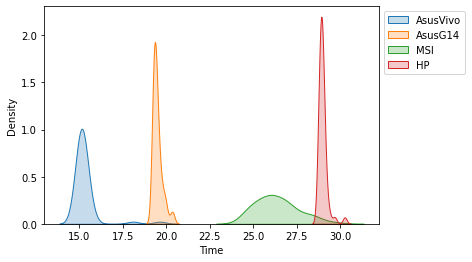

In [12]:
sns.kdeplot(df_AsusVivoGRC['Time'], shade=True)
sns.kdeplot(df_AsusG14GRC['Time'], shade=True)
sns.kdeplot(df_MSIGRC['Time'], shade=True)
sns.kdeplot(df_HPNote['Time'], shade=True)
plt.legend(labels=["AsusVivo","AsusG14","MSI","HP"], loc = 2, bbox_to_anchor = (1,1))
plt.show()

#### Shaded Density Plot for Execution Time Comparison for 4 Different Methods

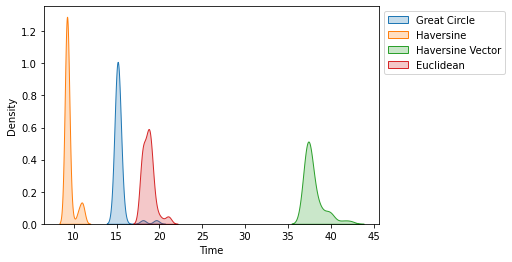

In [25]:
sns.kdeplot(df_AsusVivoGRC['Time'], shade=True)
sns.kdeplot(df_AsusVivoHav['Time'], shade=True)
sns.kdeplot(df_AsusVivoHavVec['Time'], shade=True)
sns.kdeplot(df_AsusVivoEuc['Time'], shade=True)
plt.legend(labels=["Great Circle","Haversine","Haversine Vector","Euclidean"], loc = 2, bbox_to_anchor = (1,1))
plt.show()